# Import Libraries

In [28]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import warnings
from scipy import stats
from matplotlib import pylab as plt
from statsmodels.graphics.gofplots import qqplot
from IPython.core.interactiveshell import InteractiveShell


In [40]:
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)
InteractiveShell.ast_node_interactivity = 'all'

%reload_ext autoreload
%autoreload 2
%matplotlib inline

def set_seed(seed=42):
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
set_seed()

pd.set_option("display.width", 100)
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 30)

# Read CSV Files

In [32]:
# Accomodate raw path to variables
customer, orders = "Data/customers.csv", "Data/orders.csv"
products, sales = "Data/products.csv", "Data/sales.csv"

In [33]:
# Read-in data
customer, order = pd.read_csv(customer), pd.read_csv(orders)
product, sales_data = pd.read_csv(products), pd.read_csv(sales)

# Merge Data

In [35]:
customer_order = pd.merge(left=customer, right=order, 
                      left_index=True, right_index=True) # merging
customer_order_product = pd.merge(left=cust_order, right=product, 
                    left_index=True, right_index=True) # merging

# Data Exploration

In [38]:
customer_order_product

customer_id_x        customer_name       gender  age                    home_address  \
0                1        Leanna Busson       Female   30  8606 Victoria TerraceSuite 560   
1                2  Zabrina Harrowsmith  Genderfluid   69      8327 Kirlin SummitApt. 461   
2                3      Shina Dullaghan   Polygender   59       269 Gemma SummitSuite 109   
3                4        Hewet McVitie     Bigender   67       743 Bailey GroveSuite 141   
4                5       Rubia Ashleigh   Polygender   30         48 Hyatt ManorSuite 375   
..             ...                  ...          ...  ...                             ...   
995            996       Elvira Sarfati      Agender   59    0433 Armstrong HillSuite 974   
996            997       Dickie Grushin   Non-binary   30         04 Howell PassSuite 209   
997            998       Rebecka Fabler   Polygender   32       72 Annabelle PassApt. 446   
998            999       Carita Vynarde   Polygender   30       170 Wilson AvenueApt. 577   
999           1000     Mandel Fairbanks         Male   71      1671 Lauren KnollSuite 945   

     zip_code                city                         state    country  order_id  \
0        5464       Johnstonhaven            Northern Territory  Australia         1   
1        8223     New Zacharyfort               South Australia  Australia         2   
2        5661            Aliburgh  Australian Capital Territory  Australia         3   
3        1729   South Justinhaven                    Queensland  Australia         4   
4        4032      Griffithsshire                    Queensland  Australia         5   
..        ...                 ...                           ...        ...       ...   
995      7613     Lake Danielland                      Tasmania  Australia       996   
996      6950         Ellaborough                      Tasmania  Australia       997   
997        52          Kohlerberg                    Queensland  Australia       998   
998      7849      East Oscarfurt             Western Australia  Australia       999   
999      9012  Lake Audreyborough                      Tasmania  Australia      1000   

     customer_id_y  payment order_date delivery_date  product_id product_type  product_name size  \
0               64    30811  2021-8-30    2021-09-24           0        Shirt  Oxford Cloth   XS   
1              473    50490   2021-2-3    2021-02-13           1        Shirt  Oxford Cloth    S   
2              774    46763  2021-10-8    2021-11-03           2        Shirt  Oxford Cloth    M   
3              433    39782   2021-5-6    2021-05-19           3        Shirt  Oxford Cloth    L   
4              441    14719  2021-3-23    2021-03-24           4        Shirt  Oxford Cloth   XL   
..             ...      ...        ...           ...         ...          ...           ...  ...   
995            345    37843  2021-1-13    2021-02-02         995     Trousers          Wool   XS   
996            346    53831  2021-1-18    2021-01-31         996     Trousers          Wool    S   
997            407    53308   2021-5-5    2021-05-21         997     Trousers          Wool    M   
998            428    31643  2021-6-15    2021-07-12         998     Trousers          Wool    L   
999            896    27836   2021-4-7    2021-04-24         999     Trousers          Wool   XL   

    colour  price  quantity  
0      red    114        66  
1      red    114        53  
2      red    114        54  
3      red    114        69  
4      red    114        47  
..     ...    ...       ...  
995  green    111        73  
996  green    111        43  
997  green    111        41  
998  green    111        42  
999  green    111        48  

[1000 rows x 21 columns]

In [48]:
customer_order_product.loc[:, ['payment', 'price', 'quantity']].describe()

payment        price     quantity
count   1000.000000  1000.000000  1000.000000
mean   33972.936000   108.095000    60.371000
std    14451.609047     9.158048    11.606812
min    10043.000000    90.000000    40.000000
25%    21329.250000   102.000000    50.000000
50%    33697.500000   112.000000    61.000000
75%    46249.000000   115.000000    70.000000
max    59910.000000   119.000000    80.000000

In [42]:
customer_order

customer_id_x        customer_name       gender  age                    home_address  \
0                1        Leanna Busson       Female   30  8606 Victoria TerraceSuite 560   
1                2  Zabrina Harrowsmith  Genderfluid   69      8327 Kirlin SummitApt. 461   
2                3      Shina Dullaghan   Polygender   59       269 Gemma SummitSuite 109   
3                4        Hewet McVitie     Bigender   67       743 Bailey GroveSuite 141   
4                5       Rubia Ashleigh   Polygender   30         48 Hyatt ManorSuite 375   
..             ...                  ...          ...  ...                             ...   
995            996       Elvira Sarfati      Agender   59    0433 Armstrong HillSuite 974   
996            997       Dickie Grushin   Non-binary   30         04 Howell PassSuite 209   
997            998       Rebecka Fabler   Polygender   32       72 Annabelle PassApt. 446   
998            999       Carita Vynarde   Polygender   30       170 Wilson AvenueApt. 577   
999           1000     Mandel Fairbanks         Male   71      1671 Lauren KnollSuite 945   

     zip_code                city                         state    country  order_id  \
0        5464       Johnstonhaven            Northern Territory  Australia         1   
1        8223     New Zacharyfort               South Australia  Australia         2   
2        5661            Aliburgh  Australian Capital Territory  Australia         3   
3        1729   South Justinhaven                    Queensland  Australia         4   
4        4032      Griffithsshire                    Queensland  Australia         5   
..        ...                 ...                           ...        ...       ...   
995      7613     Lake Danielland                      Tasmania  Australia       996   
996      6950         Ellaborough                      Tasmania  Australia       997   
997        52          Kohlerberg                    Queensland  Australia       998   
998      7849      East Oscarfurt             Western Australia  Australia       999   
999      9012  Lake Audreyborough                      Tasmania  Australia      1000   

     customer_id_y  payment order_date delivery_date  
0               64    30811  2021-8-30    2021-09-24  
1              473    50490   2021-2-3    2021-02-13  
2              774    46763  2021-10-8    2021-11-03  
3              433    39782   2021-5-6    2021-05-19  
4              441    14719  2021-3-23    2021-03-24  
..             ...      ...        ...           ...  
995            345    37843  2021-1-13    2021-02-02  
996            346    53831  2021-1-18    2021-01-31  
997            407    53308   2021-5-5    2021-05-21  
998            428    31643  2021-6-15    2021-07-12  
999            896    27836   2021-4-7    2021-04-24  

[1000 rows x 14 columns]

In [47]:
customer_order.loc[:, ['age', 'payment']].describe()

age       payment
count  1000.000000   1000.000000
mean     49.860000  33972.936000
std      17.647828  14451.609047
min      20.000000  10043.000000
25%      34.000000  21329.250000
50%      50.000000  33697.500000
75%      65.000000  46249.000000
max      80.000000  59910.000000

In [49]:
customer_order_product.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id_x  1000 non-null   int64 
 1   customer_name  1000 non-null   object
 2   gender         1000 non-null   object
 3   age            1000 non-null   int64 
 4   home_address   1000 non-null   object
 5   zip_code       1000 non-null   int64 
 6   city           1000 non-null   object
 7   state          1000 non-null   object
 8   country        1000 non-null   object
 9   order_id       1000 non-null   int64 
 10  customer_id_y  1000 non-null   int64 
 11  payment        1000 non-null   int64 
 12  order_date     1000 non-null   object
 13  delivery_date  1000 non-null   object
 14  product_id     1000 non-null   int64 
 15  product_type   1000 non-null   object
 16  product_name   1000 non-null   object
 17  size           1000 non-null   object
 18  colour         1000 non-null 

In [50]:
customer_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   age      1000 non-null   int64
 1   payment  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


In [54]:
#Find categorical variables

categorical = customer_order_product.select_dtypes(["category", "object"]).columns
for cat_col in categorical:
    print(f"{cat_col} : {customer_order_product[cat_col].nunique()}")

customer_name : 1000
gender : 8
home_address : 1000
city : 961
state : 8
country : 1
order_date : 291
delivery_date : 305
product_type : 3
product_name : 28
size : 5
colour : 7


In [59]:
#Find numeric variables

numeric = customer_order_product.select_dtypes(["int", "float"]).columns
for num_col in numeric:
    print(f"{num_col} : {customer_order_product[num_col].nunique()}")


customer_id_x : 1000
age : 61
zip_code : 955
order_id : 1000
customer_id_y : 617
payment : 995
product_id : 1000
price : 21
quantity : 41


In [73]:
# Create sales column
customer_order_product["sales"] = customer_order_product["price"] * customer_order_product["quantity"] 


In [70]:
customer_order_product['order_date'] = pd.to_datetime(customer_order_product['order_date'])

In [71]:
# Create Year Column
customer_order_product['year_order'] = customer_order_product['order_date'].dt.year

# Create Month Column
customer_order_product['month_order'] = customer_order_product['order_date'].dt.month

# Create Day Column
customer_order_product["day_order"] = customer_order_product["order_date"].dt.day


In [74]:
customer_order_product.head(1)

customer_id_x  customer_name  gender  age                    home_address  zip_code  \
0              1  Leanna Busson  Female   30  8606 Victoria TerraceSuite 560      5464   

            city               state    country  order_id  customer_id_y  payment order_date  \
0  Johnstonhaven  Northern Territory  Australia         1             64    30811 2021-08-30   

  delivery_date  product_id product_type  product_name size colour  price  quantity  sales  \
0    2021-09-24           0        Shirt  Oxford Cloth   XS    red    114        66   7524   

   year_order  month_order  day_order  
0        2021            8         30

In [85]:
customer_order_product.to_csv("customer_order_product.csv", index=False)

In [94]:
# Load the dataset
sales_data = pd.read_csv('customer_order_product.csv')

# Correlation Matrix

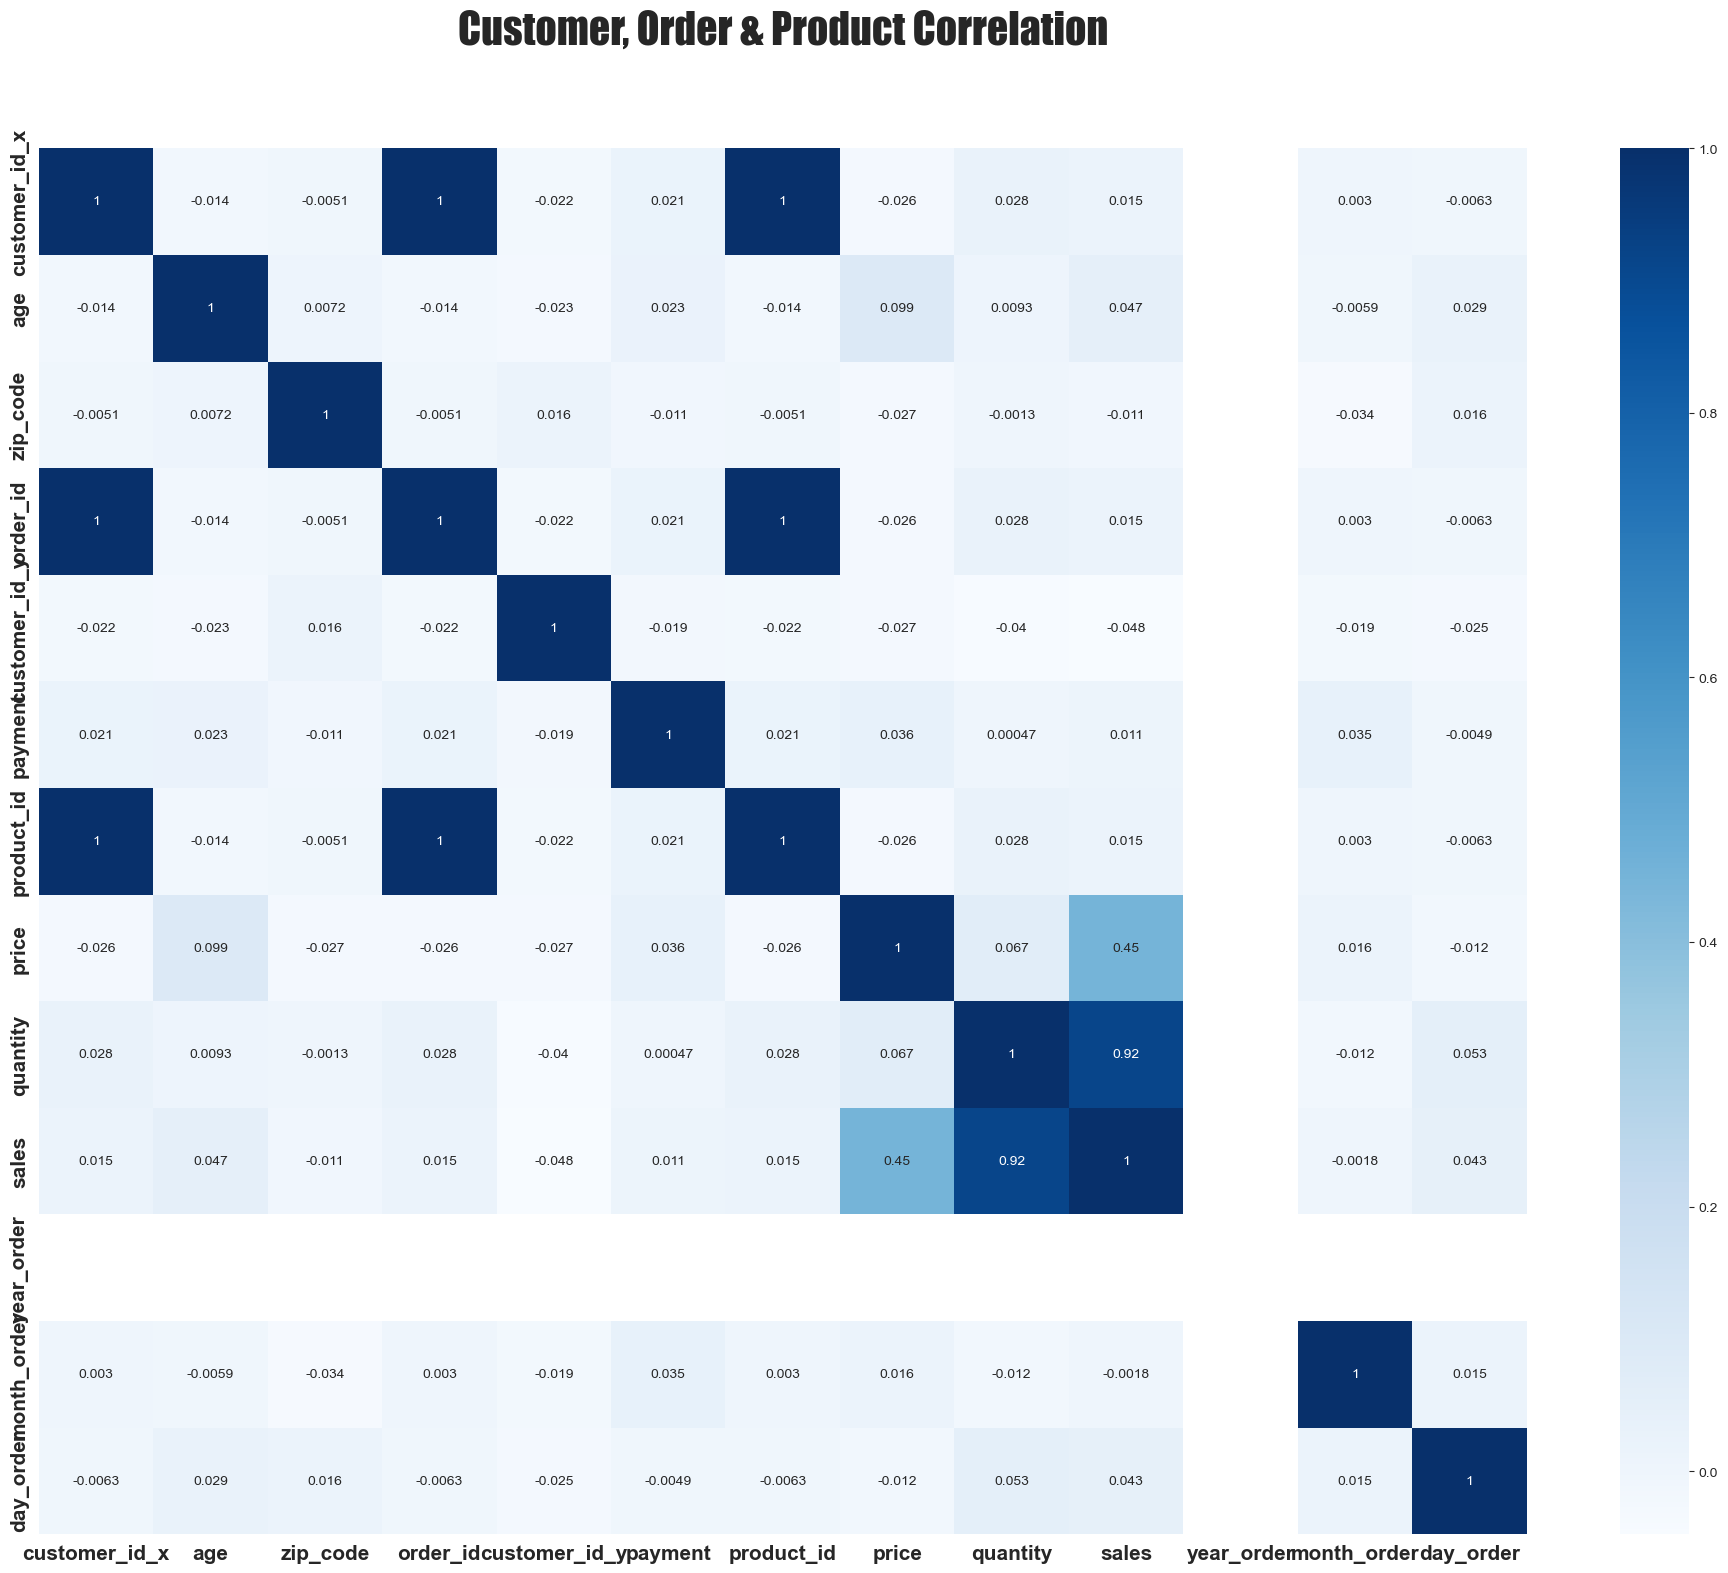

In [96]:
# Set seaborn style
sns.set_style("whitegrid") 

# Create figure and axis objects
fig = plt.figure(dpi=100, figsize=(24, 18))

# Create Heatmap
sns.heatmap(customer_order_product.corr(), annot=True, cmap="Blues") 

plt.title("Customer, Order & Product Correlation", weight="bold", fontsize=30, fontname="fantasy", pad=75) 
plt.xticks(weight="bold", fontsize=15) 
plt.yticks(weight="bold", fontsize=15); 

# Univariate Analysis

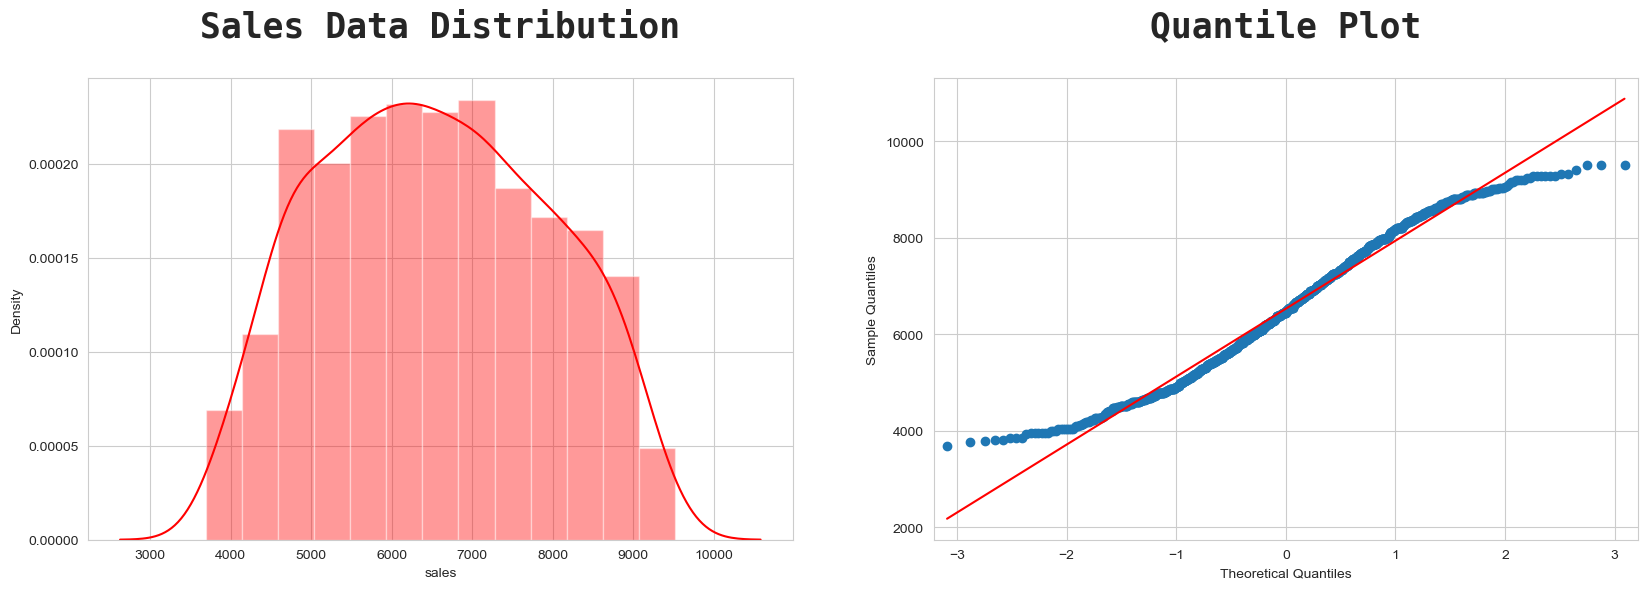

In [99]:
univariate_analysis( 
    data=customer_order_product['sales'],
    color='red', 
    title1='Sales Data Distribution', 
    title2='Quantile Plot');

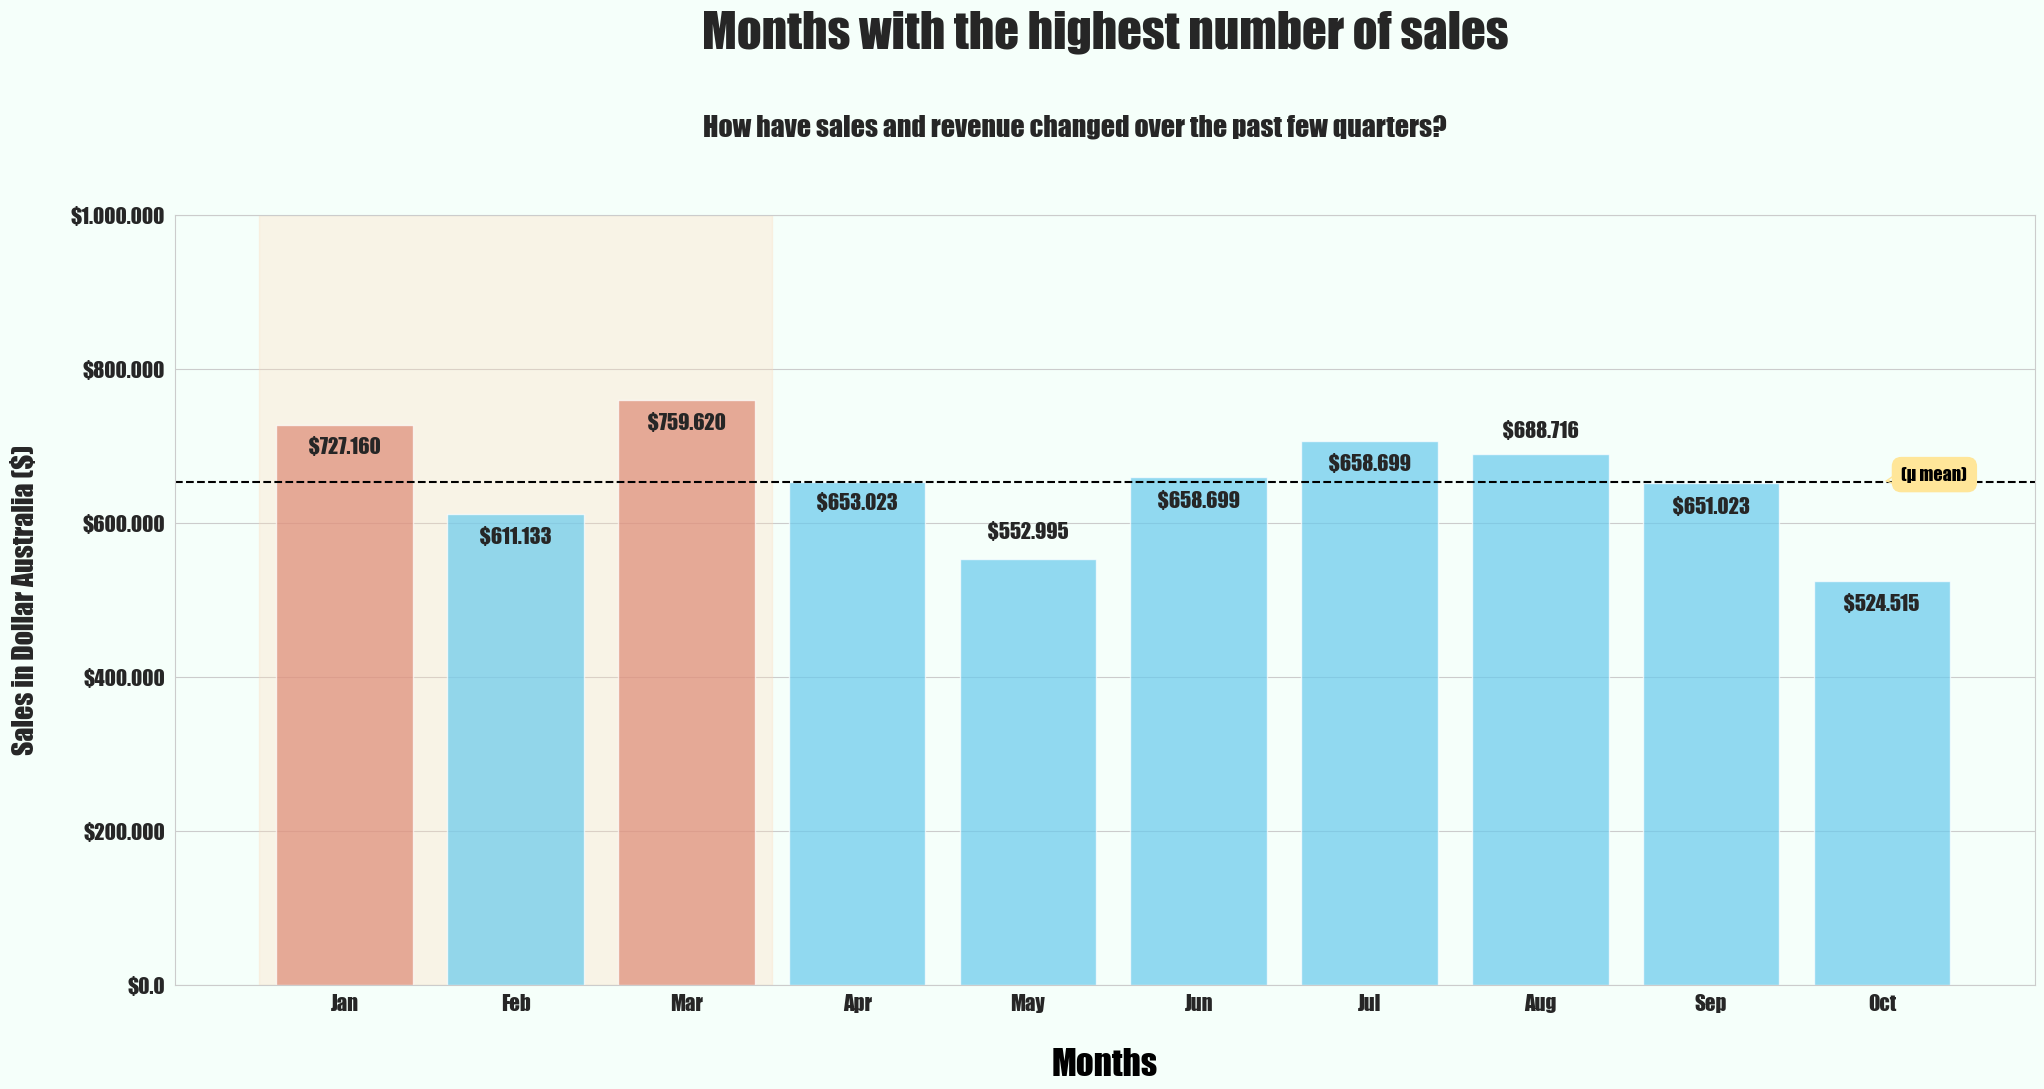

In [100]:
# set-up
color_map = ["#5FCDF5" for _ in range(20)]
color_map[0] = "#E3866F"
color_map[2] = "#E3866F"
sns.set_palette(sns.color_palette(color_map))
span_range = [-0.5, 2.5]

# group the Month cols
sum_month_order = customer_order_product.groupby(["month_order"]).sum().astype("int")

# let's plot it
fig, ax = plt.subplots(
    1, 1, 
    figsize=(24, 10), 
    facecolor="mintcream")

# makes bar plot 
sns.barplot(
    x=sum_month_order.index,
    y=sum_month_order["sales"], 
    data=sum_month_order,
    zorder=2,
    palette=color_map,
    saturation=.9,
    alpha=.7,
    ax=ax) 

# title 
ax.set_title(
    "Months with the highest number of sales", 
    fontname="fantasy", 
    weight="bold", 
    fontsize=35, 
    pad=120)

plt.suptitle(
    "How have sales and revenue changed over the past few quarters?", 
    fontname="fantasy",
    weight="bold",
    fontsize=20)

# labels
ax.set_xlabel( 
    "Months", 
    weight="bold", 
    color="black",
    family="fantasy",
    fontsize=25, 
    loc="center",
    labelpad=25)
ax.set_ylabel(
    "Sales in Dollar Australia ($)", 
    weight="bold", 
    family="fantasy",
    fontsize=20,
    labelpad=25)

# ticklabels
ax.set_xticklabels( 
    labels=["Jan", "Feb", "Mar", "Apr", "May", 
            "Jun", "Jul", "Aug", "Sep", "Oct"],
    weight="bold", 
    family="fantasy",
    fontsize=15)
ax.set_yticklabels( 
    labels=["$0.0", "$200.000", "$400.000", 
            "$600.000", "$800.000", "$1.000.000"],
    weight="bold",
    family="fantasy",
    fontsize=15)

# y-limit
ax.set_ylim(0, 1000000)

# face-color
ax.set_facecolor("mintcream")

# text 
ax.text(0, 765000-66000, " $727.160 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(1, 648500-66000, " $611.133 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(2, 797200-66000, " $759.620 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(3, 693000-66000, " $653.023 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(4, 589000, " $552.995 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(5, 696000-66000, " $658.699 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(6, 743000-66000, " $658.699 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(7, 719900, " $688.716 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(8, 688000-66000, " $651.023 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(9, 562000-66000, " $524.515 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

# annotate
ax.annotate("(μ mean)", xy=(9, sum_month_order["sales"].mean()), 
             xytext=(9.5, sum_month_order["sales"].mean() + 9000),
             size=13, ha='right', va="center", color="black", 
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

# axv-span
ax.axvspan(
    span_range[0], 
    span_range[1], 
    color="peachpuff", 
    alpha=0.3)

# axh-line
ax.axhline(
    y=sum_month_order["sales"].mean(), 
    color="black", 
    ls="--", 
    lw=1.5);

In [103]:
### set-up
labels = ["0-30yo", "31-40yo", "41-50yo", "51-60yo", "61-70yo", "71-80yo"]
bins= [30, 31, 41, 51, 61, 71, 80]
customer_order_product["age_group"] = pd.cut(customer_order_product["age"], bins=bins, labels=labels, right=False)
sum_total_age = [660,  5652,  7382,  9209, 10890, 10883]
sum_age_group = pd.DataFrame({"age": labels, "sum_total_age": sum_total_age})
color_map = ["#5FCDF5" for _ in range(6)]
color_map[5] = "#E3866F"
color_map[4] = "#E3866F"
sns.set_palette(sns.color_palette(color_map))
span_range = [3.5, 5.5]
span_range2 = [[-0.15, 0.14], 
               [0.85, 1.14], 
               [1.85, 2.14], 
               [2.85, 3.14], 
               [3.85, 4.14], 
               [4.85, 5.14]]

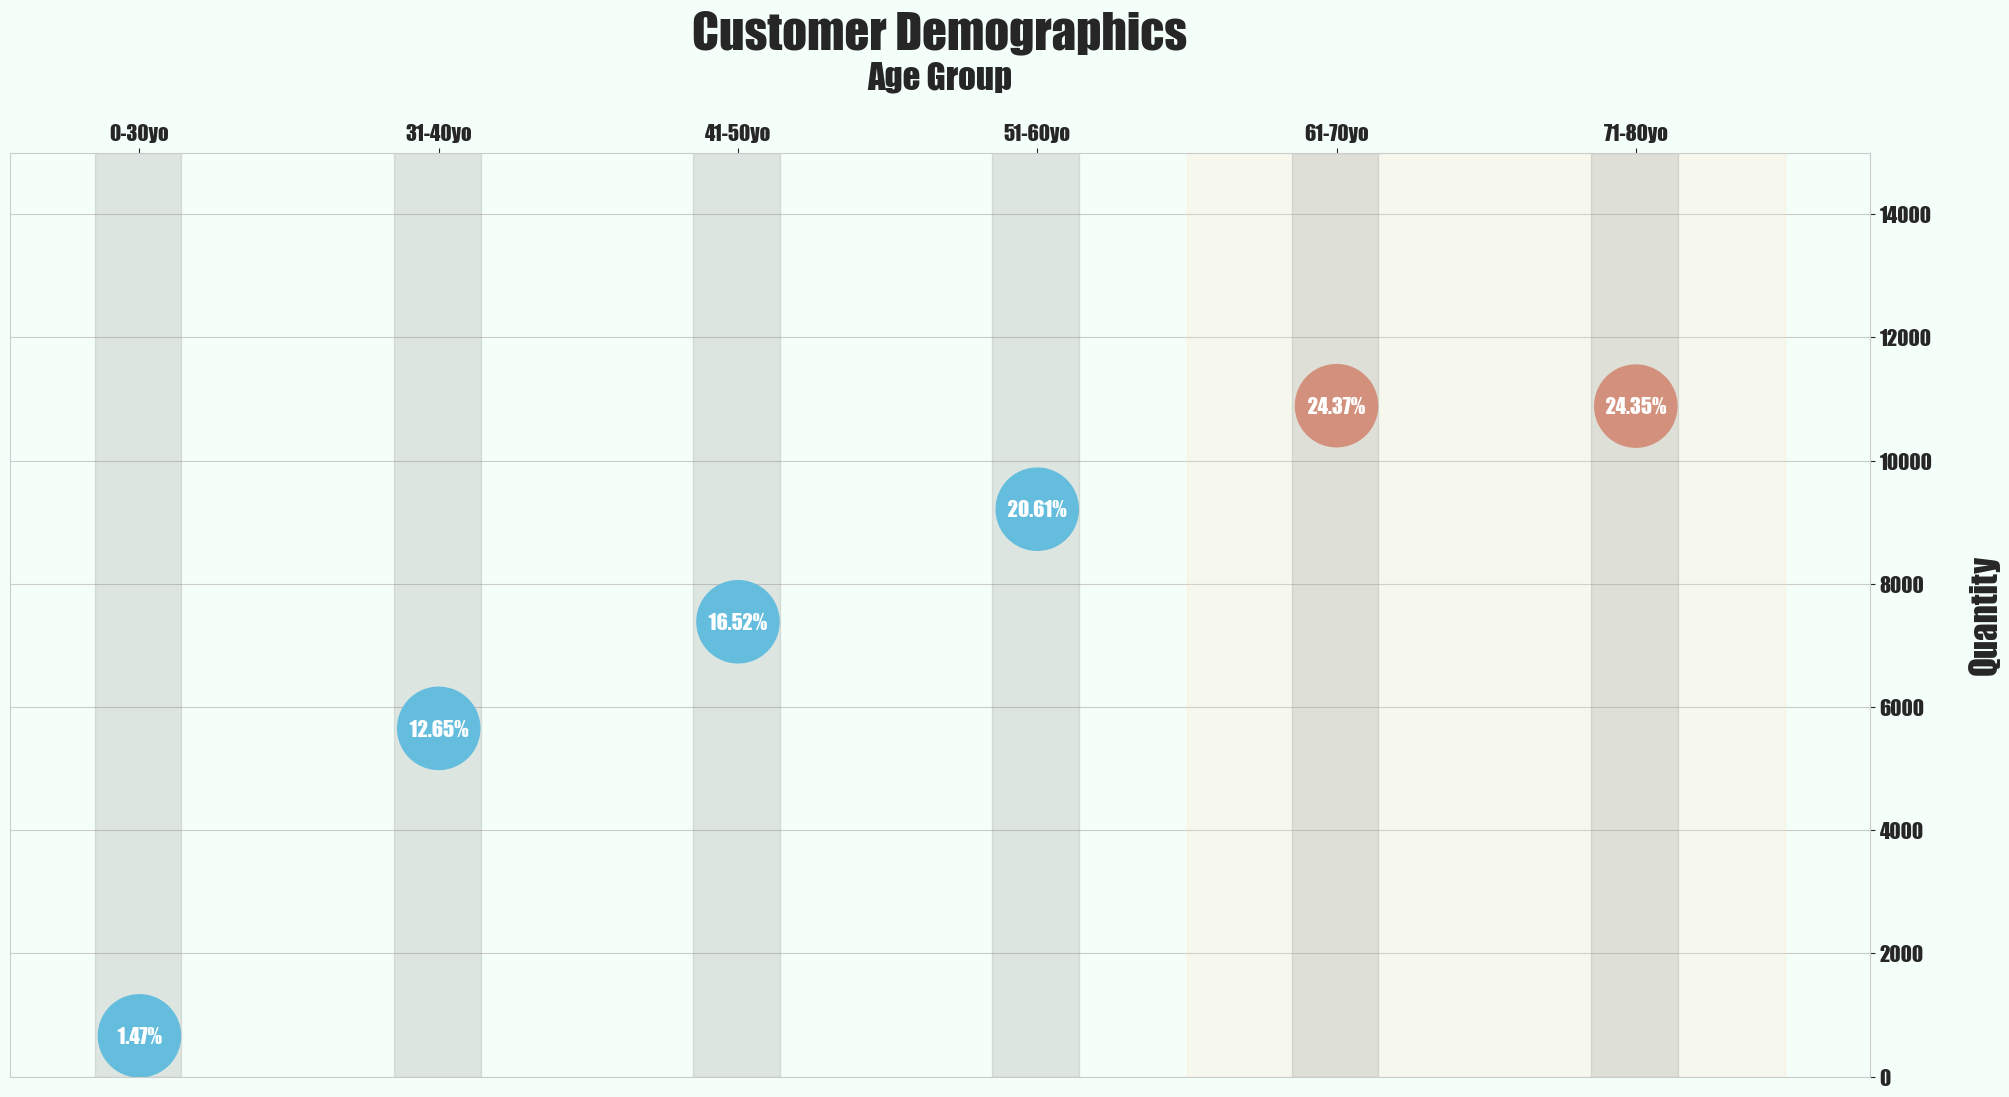

In [108]:
# subplots
fig, ax = plt.subplots(
    1, 1, 
    figsize=(24, 12), 
    facecolor=("mintcream"))

# countplot
ax.scatter(
    sum_age_group["age"], 
    sum_age_group["sum_total_age"], 
    color=color_map,
    s=3500,
    zorder=1)

# title
ax.set_title(
    "Customer Demographics", 
    fontname="fantasy",
    weight="bold",
    fontsize=35,
    pad=75)

# axv-span
ax.axvspan(span_range[0], span_range[1], color="peachpuff", alpha=0.2)
ax.axvspan(span_range2[0][0], span_range2[0][1], color="gray", alpha=0.2)
ax.axvspan(span_range2[1][0], span_range2[1][1], color="gray", alpha=0.2)
ax.axvspan(span_range2[2][0], span_range2[2][1], color="gray", alpha=0.2)
ax.axvspan(span_range2[3][0], span_range2[3][1], color="gray", alpha=0.2)
ax.axvspan(span_range2[4][0], span_range2[4][1], color="gray", alpha=0.2)
ax.axvspan(span_range2[5][0], span_range2[5][1], color="gray", alpha=0.2)
# labels
ax.set_xlabel(
    "Age Group", 
    weight="bold", 
    family="fantasy", 
    fontsize=25,
    labelpad=25)
ax.set_ylabel(
    "Quantity", 
    weight="bold", 
    family="fantasy", 
    fontsize=25,
    labelpad=25)

# ticklabels
ax.set_xticklabels(
    labels=labels, 
    weight="bold", 
    fontsize=15,
    family="fantasy")
ax.set_yticklabels(
    labels=list(np.arange(0, 16000, 2000)), 
    weight="bold", 
    fontsize=15,
    family="fantasy")

# text
ax.text(0, 660, " 1.47% ", va="center", ha="center", 
         fontsize=15, c="white", family="fantasy", weight="semibold")

ax.text(1, 5652, " 12.65% ", va="center", ha="center", 
         fontsize=15, c="white", family="fantasy", weight="semibold")

ax.text(2, 7382, " 16.52% ", va="center", ha="center", 
         fontsize=15, c="white", family="fantasy", weight="semibold")

ax.text(3, 9209, " 20.61% ", va="center", ha="center", 
         fontsize=15, c="white", family="fantasy", weight="semibold")

ax.text(4, 10890, " 24.37% ", va="center", ha="center", 
         fontsize=15, c="white", family="fantasy", weight="semibold")

ax.text(5, 10883, " 24.35% ", va="center", ha="center", 
         fontsize=15, c="white", family="fantasy", weight="semibold")

# adjust ticks
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")

# y-limit
ax.set_ylim(0, 15000)

ax.grid(b=None, which="major", axis="x")

# face-color
ax.set_facecolor("mintcream");

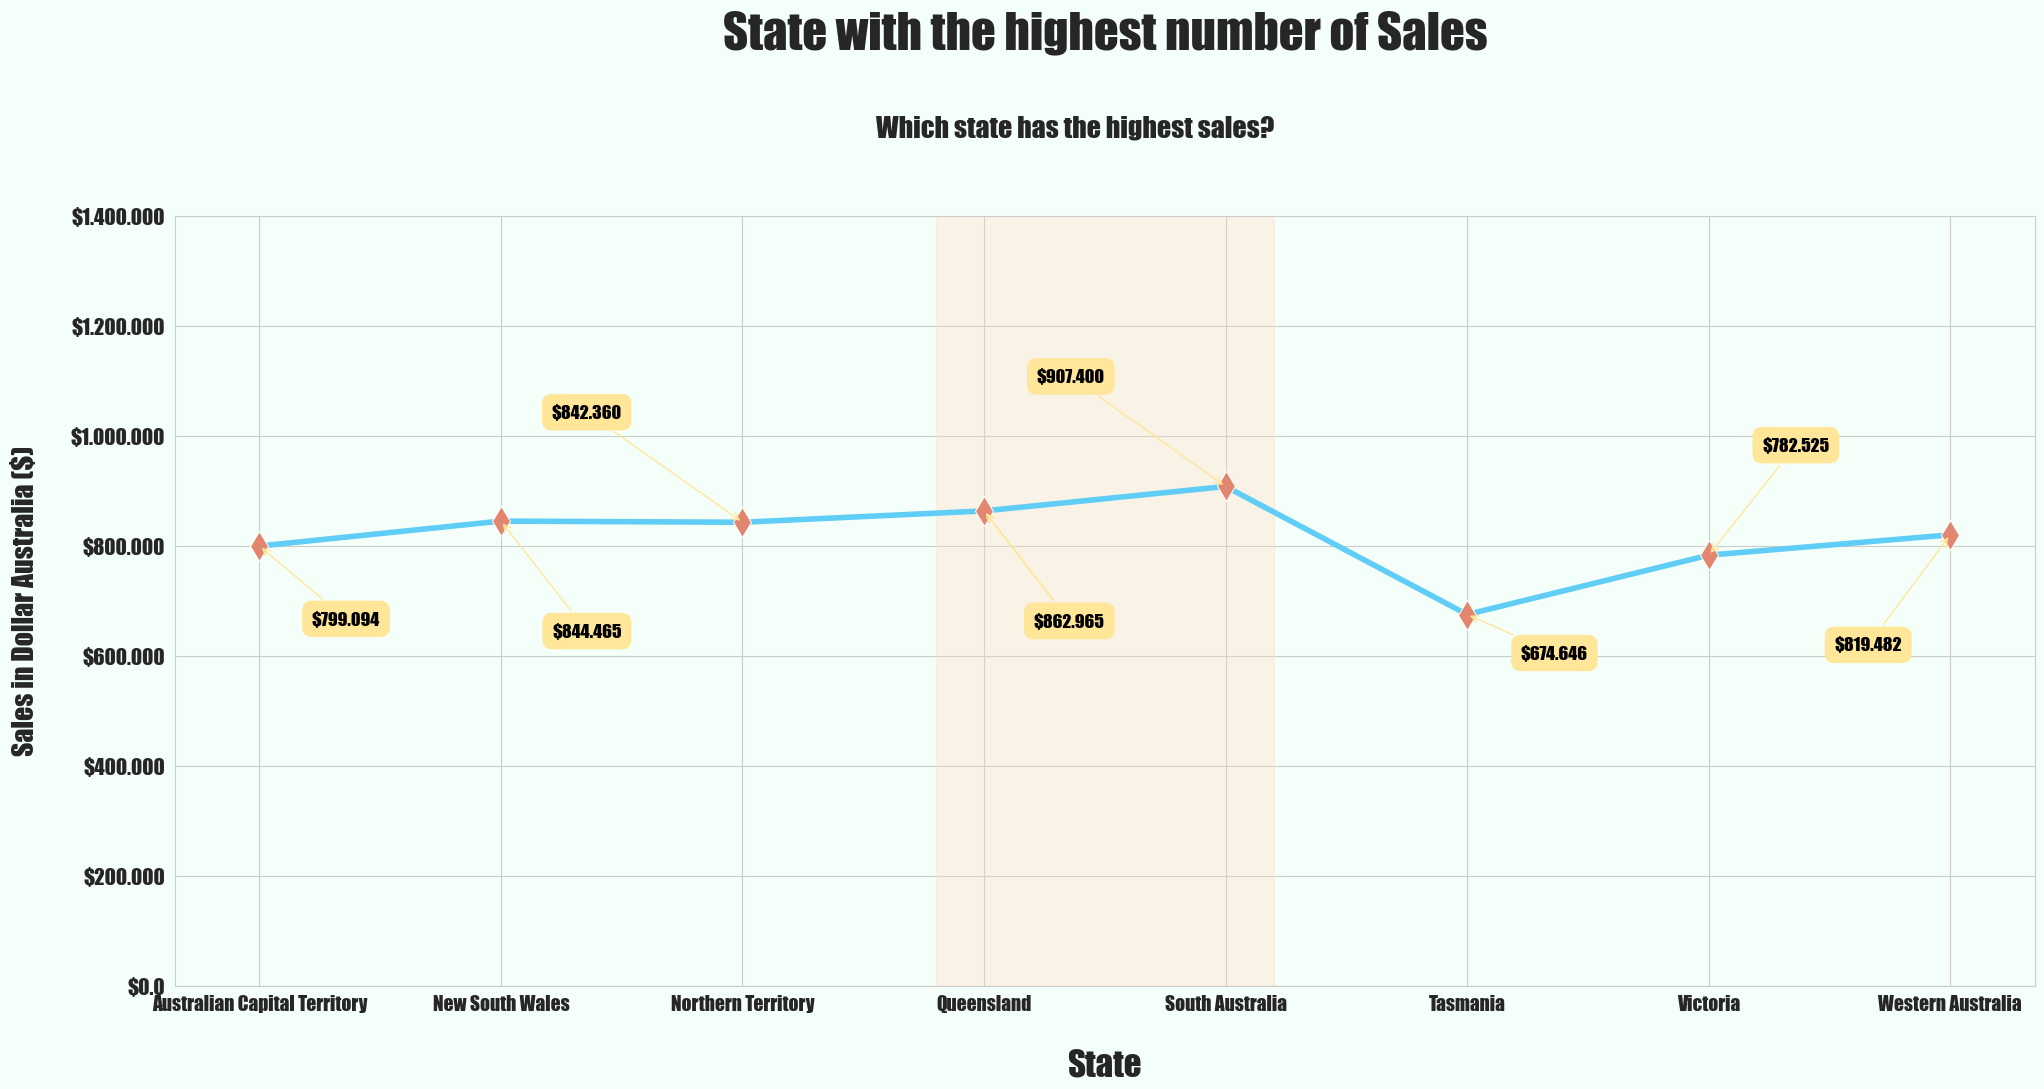

In [109]:
# set-up
color_map = ["#5FCDF5" for _ in range(8)]
color_map[4] = color_map[3] = "#E3866F"
sns.set_palette(sns.color_palette(color_map))
state = ['Australian Capital Territory', 'New South Wales', 'Northern Territory', 'Queensland',
         'South Australia', 'Tasmania', 'Victoria', 'Western Australia']
values = [799094, 844465, 842360, 862965, 907400, 674646, 782525, 819482]
state_sales = pd.DataFrame({"state": state, "values": values})
span_range = [2.8, 4.2]

# let's plot it
fig, ax = plt.subplots(
    1, 1,
    figsize=(24, 10),
    facecolor="mintcream")

# makes bar plot 
sns.lineplot(
    x=state_sales["state"],
    y=state_sales["values"],
    data=state_sales,
    marker="d",
    markersize=15,
    markerfacecolor="#E3866F",
    lw=4,
    color="#5FCDF5",
    ax=ax)

# title
ax.set_title( # title
    "State with the highest number of Sales", 
    fontname="fantasy",
    weight="bold",
    fontsize=35,
    pad=120)
plt.suptitle(
    "Which state has the highest sales?", 
    fontname="fantasy",
    weight="bold",
    fontsize=20)

# labels
ax.set_xlabel(
    "State", 
    family="fantasy",
    weight="bold",
    fontsize=25,
    loc="center",
    labelpad=25)
ax.set_ylabel( # y-label
    "Sales in Dollar Australia ($)", 
    family="fantasy",
    weight="bold",
    fontsize=20, 
    loc="center",
    labelpad=25)

# ticklabels
ax.set_xticklabels(
    labels=state_sales["state"],
    weight="bold", 
    fontsize=14, 
    family="fantasy",
    rotation=0)
ax.set_yticklabels(
    labels=["$0.0",     "$200.000",
            "$400.000", "$600.000",
            "$800.000", "$1.000.000",
            "$1.200.000", "$1.400.000"],
    weight="bold",
    family="fantasy",
    fontsize=15)

# annotate
ax.annotate("$799.094", xy=(0, 799094), xytext=(0.5, 666666),
             size=13, ha='right', va="center", color="black", 
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$844.465", xy=(1, 844465), xytext=(1.5, 644465),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$842.360", xy=(2, 842360), xytext=(1.5, 1042360),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$862.965", xy=(3, 862965), xytext=(3.5, 662965),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$862.965", xy=(3, 862965), xytext=(3.5, 662965),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$907.400", xy=(4, 907400), xytext=(3.5, 1107400),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$674.646", xy=(5, 674646), xytext=(5.5, 604646),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$782.525", xy=(6, 782525), xytext=(6.5, 982525),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$819.482", xy=(7, 819482), xytext=(6.8, 619482),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

# axv-span
ax.axvspan(span_range[0], 
           span_range[1], 
           color="peachpuff", 
           alpha=0.3)

# facecolor
ax.set_facecolor("mintcream")

# y-limits
ax.set_ylim(0, 1400000);


In [110]:
customer_order_product.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id_x  1000 non-null   int64         
 1   customer_name  1000 non-null   object        
 2   gender         1000 non-null   object        
 3   age            1000 non-null   int64         
 4   home_address   1000 non-null   object        
 5   zip_code       1000 non-null   int64         
 6   city           1000 non-null   object        
 7   state          1000 non-null   object        
 8   country        1000 non-null   object        
 9   order_id       1000 non-null   int64         
 10  customer_id_y  1000 non-null   int64         
 11  payment        1000 non-null   int64         
 12  order_date     1000 non-null   datetime64[ns]
 13  delivery_date  1000 non-null   object        
 14  product_id     1000 non-null   int64         
 15  product_type   1000 no

In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [127]:
# Load the dataset
df = pd.read_csv('customer_order_product.csv')

In [128]:
# Aggregate the data by product type and calculate total revenue
df_revenue = df.groupby('product_type').apply(lambda x: (x['quantity']*x['price']).sum()).reset_index()
df_revenue.columns = ['product_type', 'revenue']

In [115]:
# Merge the revenue data with the original dataset
df = pd.merge(df, df_revenue, on='product_type', how='left')

In [129]:
# Select the relevant columns
X = df[['quantity']]
y = df['sales']

In [130]:
# Add a constant term to the predictor variable
X = sm.add_constant(X)

In [131]:
# Create and fit the linear regression model
model = sm.OLS(y, X).fit()

In [132]:
# Print the summary statistics of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     5351.
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        13:29:06   Log-Likelihood:                -7743.7
No. Observations:                1000   AIC:                         1.549e+04
Df Residuals:                     998   BIC:                         1.550e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -193.4238     93.637     -2.066      0.0

In [134]:
import statsmodels.api as sm

# Select the relevant columns and split the data into training and testing sets
X = df[['quantity']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the independent variable
X_train = sm.add_constant(X_train)

# Create and train the OLS model
model = sm.OLS(y_train, X_train).fit()

# Make predictions on the test set
X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

# Calculate R-squared and p-value
print(f"R-squared: {model.rsquared}")
print(f"p-value: {model.f_pvalue}")


R-squared: 0.8521994554505644
p-value: 0.0


In [135]:
df.head()

customer_id_x        customer_name       gender  age                    home_address  zip_code  \
0              1        Leanna Busson       Female   30  8606 Victoria TerraceSuite 560      5464   
1              2  Zabrina Harrowsmith  Genderfluid   69      8327 Kirlin SummitApt. 461      8223   
2              3      Shina Dullaghan   Polygender   59       269 Gemma SummitSuite 109      5661   
3              4        Hewet McVitie     Bigender   67       743 Bailey GroveSuite 141      1729   
4              5       Rubia Ashleigh   Polygender   30         48 Hyatt ManorSuite 375      4032   

                city                         state    country  order_id  customer_id_y  payment  \
0      Johnstonhaven            Northern Territory  Australia         1             64    30811   
1    New Zacharyfort               South Australia  Australia         2            473    50490   
2           Aliburgh  Australian Capital Territory  Australia         3            774    46763   
3  South Justinhaven                    Queensland  Australia         4            433    39782   
4     Griffithsshire                    Queensland  Australia         5            441    14719   

   order_date delivery_date  product_id product_type  product_name size colour  price  quantity  \
0  2021-08-30    2021-09-24           0        Shirt  Oxford Cloth   XS    red    114        66   
1  2021-02-03    2021-02-13           1        Shirt  Oxford Cloth    S    red    114        53   
2  2021-10-08    2021-11-03           2        Shirt  Oxford Cloth    M    red    114        54   
3  2021-05-06    2021-05-19           3        Shirt  Oxford Cloth    L    red    114        69   
4  2021-03-23    2021-03-24           4        Shirt  Oxford Cloth   XL    red    114        47   

   sales  year_order  month_order  day_order  
0   7524        2021            8         30  
1   6042        2021            2          3  
2   6156        2021           10          8  
3   7866        2021            5          6  
4   5358        2021            3         23

In [136]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [142]:
# Train a linear regression model to predict total revenue
X = df[['quantity']]
y = df['month_order']
X = sm.add_constant(X)  # Add a constant term to the predictor variable
model = sm.OLS(y, X)  # Use the OLS method to fit a linear regression model
results = model.fit()

In [143]:
# Print the statistical values
print('Coefficient: {}'.format(results.params[1]))
print('Intercept: {}'.format(results.params[0]))
print('R-squared: {}'.format(results.rsquared))
print('Mean squared error: {}'.format(results.mse_resid))
print('p-value: {}'.format(results.pvalues[1]))

Coefficient: -0.0029238087303200587
Intercept: 5.552513256858154
R-squared: 0.00014202696485432487
Mean squared error: 8.115704902765385
p-value: 0.7066145915911639


In [144]:
# Create and fit the linear regression model
model = sm.OLS(y, X).fit()

In [145]:
# Print the summary statistics of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            month_order   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1418
Date:                Sun, 07 May 2023   Prob (F-statistic):              0.707
Time:                        13:45:40   Log-Likelihood:                -2464.8
No. Observations:                1000   AIC:                             4934.
Df Residuals:                     998   BIC:                             4943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5525      0.477     11.631      0.0